# Lab 6

Saransh Kacharia
<br>
November 24th, 2020

## Problem 1

For the LHC data, we are going to have to fake a background, a Poisson distribution with $\mu = 100$.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (7,5)

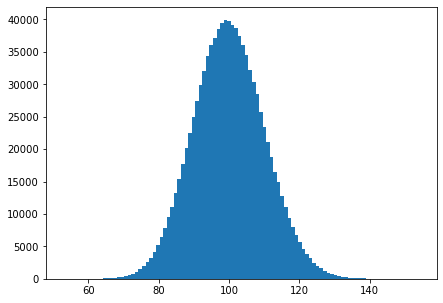

In [13]:

bkgd = stats.poisson.rvs(mu=100, loc=0, size=1000000)
plt.hist(bkgd, bins=100);
plt.show()

In [4]:
sigma = 1 - stats.norm.cdf(5)
requiredSignal = stats.poisson.ppf(1-sigma, mu = 100)
print(f'Required signal for 5 sigma significance: {requiredSignal}')

Required signal for 5 sigma significance: 154.0


## Problem 2

We will now inject a signal of $8 \sigma$ into the background data.

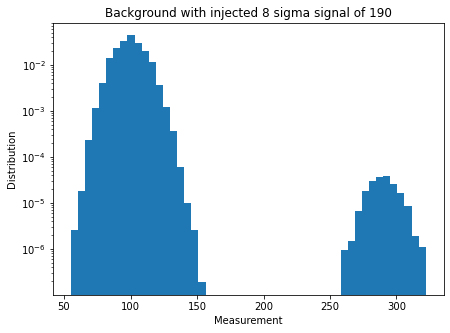

In [5]:
sigma = 1 - stats.norm.cdf(8)
requiredSignal = stats.poisson.ppf(1-sigma, mu = 100)

injected1 = stats.poisson.rvs(mu=100, loc=0, size=1000) + requiredSignal
data = np.append(bkgd, injected1)
plt.title(f'Background with injected 8 sigma signal of {requiredSignal:.0f}')
plt.xlabel('Measurement')
plt.ylabel('Distribution')
plt.hist(data, bins=50, density=True)
plt.yscale('log')
plt.show()

This histogram shows two gaussians, the first one is the background, and the second one is the injected signal with the background noise. The observed signal apears to read a measurment of 290.

This observed signal is biased, the true signal is most likely to be 100 less than the observed signal. This is because the injected signal includes the background which has a mean of 100. The signal is symmetric about 290.

## Problem 3

Now we will inject signals from $0 \sigma$ to $30 \sigma$

In [6]:
plt.rcParams["figure.figsize"] = (13,10)

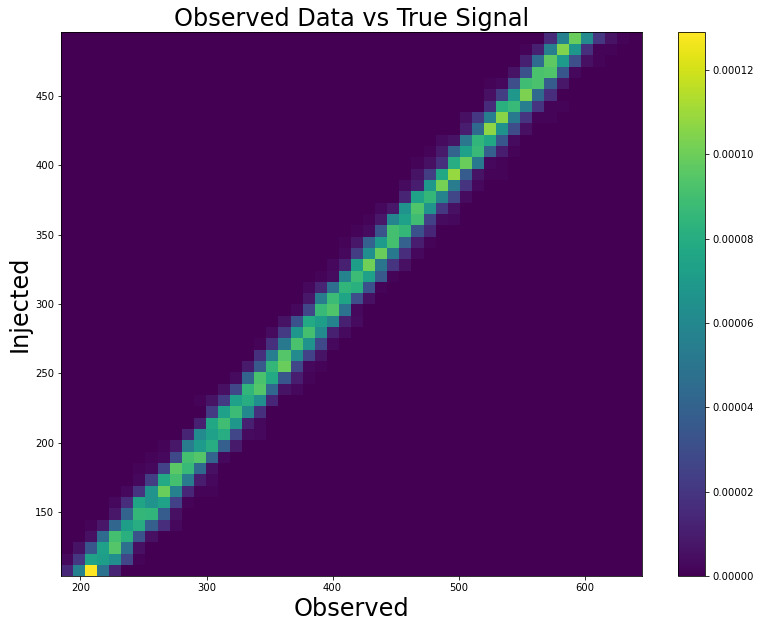

In [7]:
minSignal = 100
maxSignal = 500
noise = stats.poisson.rvs(mu=100, size=10000)
injected = np.linspace(minSignal, maxSignal, 10000)
observed = noise + injected

signaledges = np.linspace(100,500,50)
dataedges = np.linspace(180,650,50)

Psd, temp, temp2= np.histogram2d(observed, injected, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
h = plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.colorbar(h)
plt.title('Observed Data vs True Signal', fontsize=24)
plt.ylabel('Injected', fontsize = 24)
plt.xlabel('Observed', fontsize = 24)
plt.show()

Distribution of injected signals given some observed signals. We see that the injected signals are offset by -100 from the observed signals.

In [8]:
plt.rcParams["figure.figsize"] = (7,5)

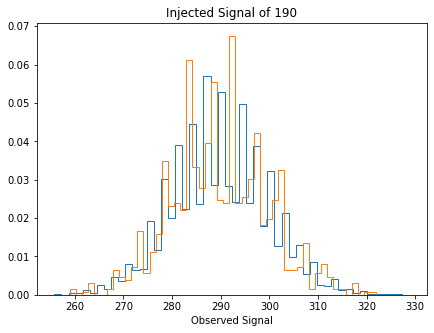

In [9]:
observed = noise + signaledges[11]
plt.hist(observed, 50, histtype='step', density=True)
plt.hist(injected1, 50, histtype='step', density=True)
plt.title('Injected Signal of 190')
plt.xlabel('Observed Signal')
plt.show()

For an injected signal power of 190 we get a very similar distribution as we did in problem 2. It is slightly different because the noise is recreated.

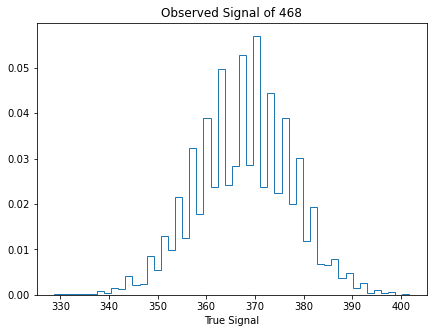

In [10]:
injected = dataedges[30] - noise
plt.hist(injected, 50, histtype='step', density=True)
plt.title('Observed Signal of 468')
plt.xlabel('True Signal')
plt.show()

We can see from this histogram that when we observe a signal of 468, the true signal is normal distribution around 362. This makes sense because the background adds 100 to the observed signal. 

In [11]:
mean = injected.mean()
std = injected.std()
print(f'Mean: {mean:.2f}, std: {std:.2f}')

Mean: 367.72, std: 9.88


The $1 \sigma$ uncertainty is 9.88.

The observed signal is biased and symmetric. It is biased by 100 and it is symmetric about the mean.